# ***Ciencia de datos astronomicos***

Un proyecto y corecto analisis de ciencia de datos nos permite trabajar con cantidades enormes de los mismos segun sea el ambito, en python por ejemplo podemos analizar cantidades enormes de datos desde las decenas de miles hasta las millones o miles de millones para Big Data, uno de los usos recurrentes de esta herramienta es la de analisis astronomico, pues sus interpretaciones permiten interpolar mucha informacion que viene de observatorios y telescopios en orbita como el JW o el hubble.

Haciendo uso de estas herramientas es que se pudo crear la primera imagen de un agujero negro, integrando y analizando cantidades enormes de informacion.

### **Data mining**

Consiste fundamentalmente en obtener los datos fundamentales, generalmente de un banco de datos optimo que pueda proporcionar toda la informacion necesaria, en este caso es mediante [Nasa Exoplantet Achive](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS) de donde obtivmos los datos necesarios como el año de descubrimiento, la masa, el metodo por el que fue descubierto y el nombre del exoplaneta

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
stellar_df = pd.read_csv("./Data/PS_2024.03.30_23.30.33.csv")
stellar_df

,pl_name,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_bmasse,pl_orbeccen,pl_eqt,sy_gaiamag
0,11 Com b,0,2,1,Radial Velocity,2007,NaN,5434.70000,NaN,NaN,4.44038
1,11 Com b,0,2,1,Radial Velocity,2007,326.03000,6165.60000,0.231,NaN,4.44038
2,11 Com b,1,2,1,Radial Velocity,2007,323.21000,4914.89849,0.238,NaN,4.44038
3,11 UMi b,1,1,1,Radial Velocity,2009,516.21997,4684.81420,0.080,NaN,4.56216
4,11 UMi b,0,1,1,Radial Velocity,2009,NaN,3432.40000,NaN,NaN,4.56216
...,...,...,...,...,...,...,...,...,...,...,...
35891,ups And d,0,2,3,Radial Velocity,1999,1319.00000,1255.38000,0.269,NaN,3.98687
35892,ups Leo b,1,1,1,Radial Velocity,2021,385.20000,162.09249,0.320,NaN,4.03040
35893,xi Aql b,0,1,1,Radial Velocity,2007,NaN,642.00000,NaN,NaN,4.42501
35894,xi Aql b,0,1,1,Radial Velocity,2007,136.75000,890.00000,0.000,NaN,4.42501


### **Data Analysis**

Comenzamos ahora con un analisis simple de los datos, usando seaborn podemos ver la densidad de los datos (similar a un histogram) de manera que podemos saber en que periodo fue el auge del descubrimiento de exoplanetas

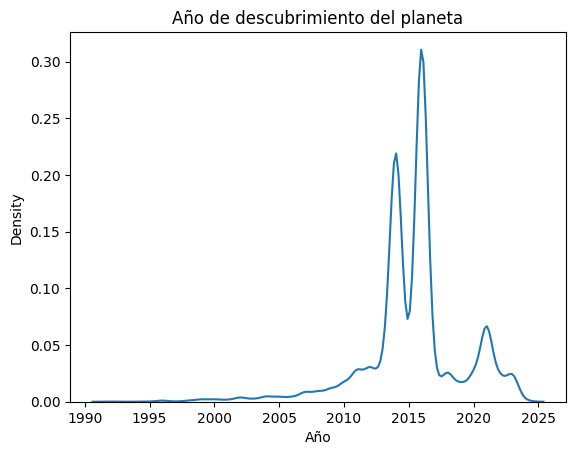

In [3]:
sns.kdeplot(stellar_df["disc_year"])
plt.title("Año de descubrimiento del planeta")
plt.xlabel("Año")
plt.show()

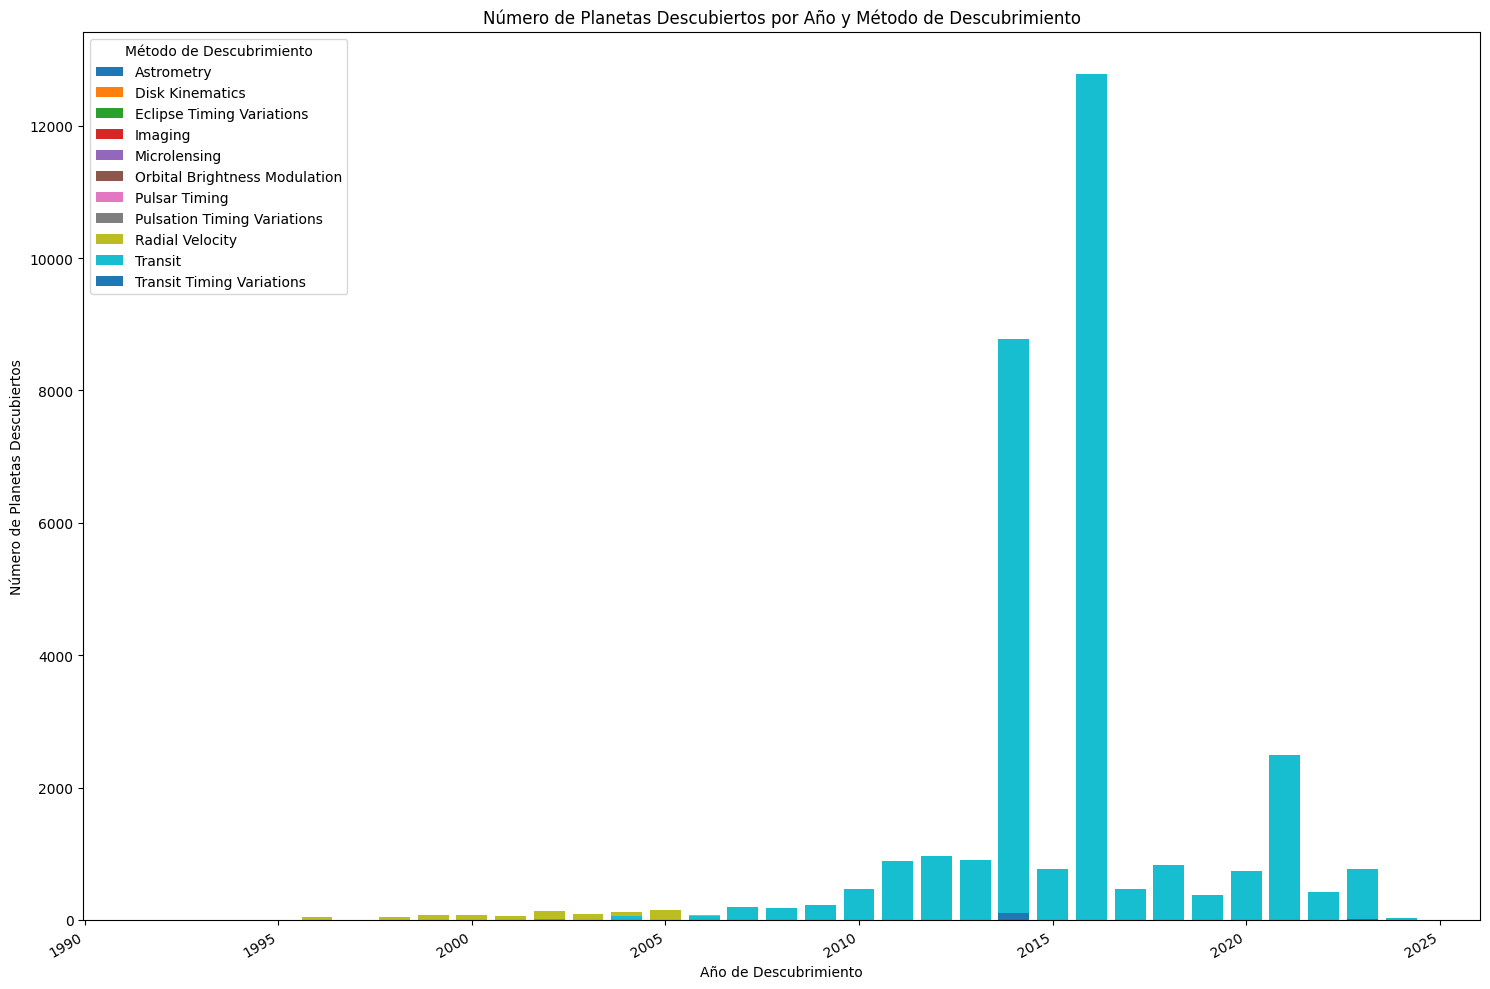

In [4]:
# Agrupar por método de descubrimiento y año, y contar los planetas para cada combinación
grouped = stellar_df.groupby(['discoverymethod', 'disc_year']).size().unstack(fill_value=0)

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(15, 10))

# Iterar sobre cada método de descubrimiento
for method, data in grouped.iterrows():
    # Para cada método, añadir una barra que represente los descubrimientos por año
    ax.bar(data.index, data, label=method)

# Configuración de etiquetas y título
ax.set_xlabel("Año de Descubrimiento")
ax.set_ylabel("Número de Planetas Descubiertos")
ax.set_title("Número de Planetas Descubiertos por Año y Método de Descubrimiento")
ax.legend(title="Método de Descubrimiento", loc="upper left")

plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


### **Analisis de la relacion entre la masa y el periodo orbital**

Podemos hacer un analisis y comprender la coorelacion entre la masa de un objeto celeste (exoplaneta) y su periodo orbital

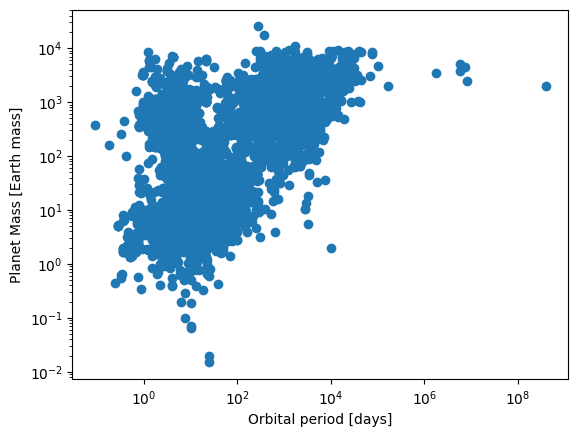

In [5]:
plt.scatter(stellar_df["pl_orbper"], stellar_df["pl_bmasse"])

plt.title("")

plt.ylabel("Planet Mass [Earth mass]")
plt.xlabel("Orbital period [days]")
plt.yscale("log")
plt.xscale("log")

plt.show()

### **Entrenando modelo de prediccion**

Una parte importante de la ciencia de datos es analizar estos de tal manera que podemos predecir de manera certera futuros escenarios, por ejemplo, dado un periodo orbital podemos reducir esfuerzos y tiempos en descubir la masa de dicho planeta en especifico.

### Modelo basico de ML

In [6]:
# Ejemplo de una red neuronal simple en keras
import tensorflow as tf

print(f"TensowFlow version: {tf.__version__}")

mnist = tf.keras.datasets.mnist

2024-03-31 06:11:54.331915: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-31 06:11:54.335081: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-31 06:11:54.377235: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-31 06:11:55.113097: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


TensowFlow version: 2.16.1


In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation="softmax")
])


/home/fernudev/Projects/Curso_python/venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [10]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8546 - loss: 0.4884
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9559 - loss: 0.1510
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9665 - loss: 0.1129
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9734 - loss: 0.0869
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9769 - loss: 0.0719


In [11]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9740 - loss: 0.0876


[0.07594381272792816, 0.9776999950408936]

### **Modelo de regresion logaritmica**

Dado que los datos de que analizaremos de los planetas en la relacion masa-periodo estan en una escala logaritmica entonces diseñaremos un modelo de ML de regresion y clasificacion logaritmica para predecir correctamente los datos de este modelo

In [12]:
stellar_df_orbits = pd.DataFrame(stellar_df["pl_orbper"].fillna(0))
stellar_df_orbits

,pl_orbper
0,0.00000
1,326.03000
2,323.21000
3,516.21997
4,0.00000
...,...
35891,1319.00000
35892,385.20000
35893,0.00000
35894,136.75000


In [13]:
stellar_df_mass = pd.DataFrame(stellar_df["pl_bmasse"].fillna(0))
stellar_df_mass

,pl_bmasse
0,5434.70000
1,6165.60000
2,4914.89849
3,4684.81420
4,3432.40000
...,...
35891,1255.38000
35892,162.09249
35893,642.00000
35894,890.00000


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(stellar_df_orbits, stellar_df_mass, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión logarítmica
model = LinearRegression()
model.fit(X_train, y_train)  # Aplicar logaritmo a las características y etiquetas

# Predecir las masas de los planetas en el conjunto de prueba
y_pred = model.predict(X_test)  # Deshacer el logaritmo de las predicciones

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 361008.9471103533


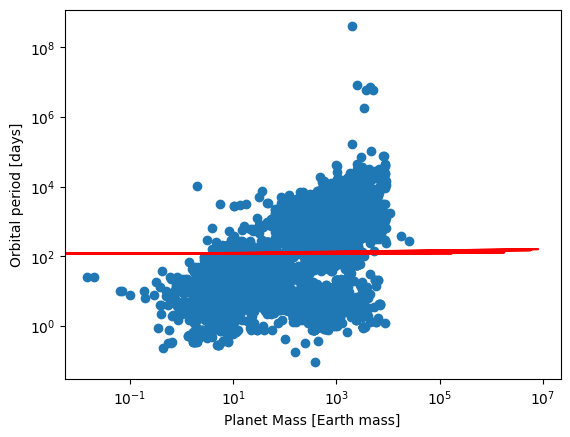

In [15]:
plt.plot(X_test, y_pred, 'r')
plt.scatter(stellar_df["pl_bmasse"], stellar_df["pl_orbper"])

plt.title("")

plt.xlabel("Planet Mass [Earth mass]")
plt.ylabel("Orbital period [days]")
plt.yscale("log")
plt.xscale("log")
plt.show()

## **Clasificacion del brillo de una estella con una Red Convolucional por TESS**

Se clasificara datos y se compilara una CNN para clasificar datos astronomicos en forma vectorial

In [16]:
# arrays
import numpy as np

# fits
from astropy.io import fits
from astropy.utils.data import download_file

# plotting
import matplotlib.pyplot as plt

# keras
from keras.models import Model, load_model
from keras.layers import Input, Flatten, Dense, Dropout, Conv1D, MaxPooling1D

# sklearn 
from sklearn import metrics

# ligthkurve
from lightkurve import search_lightcurve


# Configurando random reproduct
np.random.seed(42)

### Importando los datos de entrenamiento

Cargamos los ejemplos de curvas de luz de TESS para poder entrenar el modelo de ML y asi predecir datos importantes usando una CNN

In [17]:
file_url = 'https://archive.stsci.edu/hlsps/hellouniverse/hellouniverse_stella_500.fits'
hdu = fits.open(download_file(file_url, cache=True))

El data set stella contiene datos tanto de entrenamiento, test y validacion de las curvas de luminosidad

In [18]:
train_data = hdu[1].data["train_data"]
train_labels = hdu[1].data["train_labels"]

test_data = hdu[2].data["test_data"]
test_labels = hdu[2].data["test_labels"]

val_data = hdu[3].data["val_data"]
val_labels = hdu[3].data["val_labels"]

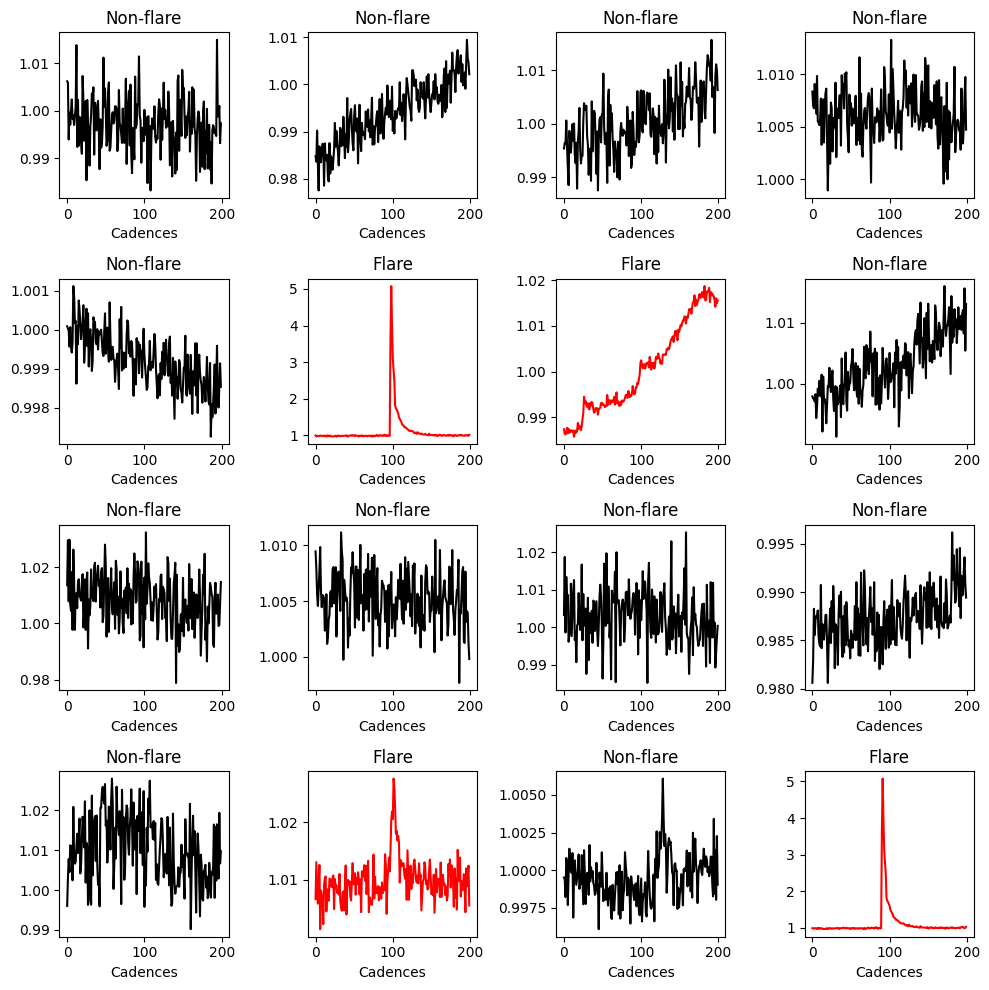

In [19]:
# select random image indices:
example_ids = np.random.choice(len(train_labels), 16)

# pull the lightcurves and labels for these selections
example_lightcurves = [train_data[j] for j in example_ids]
example_labels = [train_labels[j] for j in example_ids]


# initialize your figure
fig = plt.figure(figsize=(10, 10))

# loop through the randomly selected images and plot with labels
colors = {1: 'r', 0: 'k'}
titles = {1: 'Flare', 0: 'Non-flare'}
for i in range(len(example_ids)):
    plt.subplot(4, 4, i + 1)
    plt.plot(example_lightcurves[i], color=colors[example_labels[i]])
    plt.title(titles[example_labels[i]])
    plt.xlabel('Cadences')
    
plt.tight_layout()
plt.show()

## **Construyendo una red neuronal**

Construimos una red neuronal como la que se describe en [Feinstein et al.2020](https://iopscience.iop.org/article/10.3847/1538-3881/abac0a)

In [20]:
# Construimos el diseño de la arquitectura de neuronas

seed = 2
np.random.seed(seed)

filter1 = 16
filter2 = 64
dense = 32
dropout = 0.1

# Define architecture for model
data_shape = np.shape(train_data)
input_shape = (np.shape(train_data)[1], 1)

x_in = Input(shape=input_shape)
c0 = Conv1D(7, filter1, activation='relu', padding='same', input_shape=input_shape)(x_in)
b0 = MaxPooling1D(pool_size=2)(c0)
d0 = Dropout(dropout)(b0)

c1 = Conv1D(3, filter2, activation='relu', padding='same')(d0)
b1 = MaxPooling1D(pool_size=2)(c1)
d1 = Dropout(dropout)(b1)


f = Flatten()(d1)
z0 = Dense(dense, activation='relu')(f)
d2 = Dropout(dropout)(z0)
y_out = Dense(1, activation='sigmoid')(d2)

cnn = Model(inputs=x_in, outputs=y_out)


/home/fernudev/Projects/Curso_python/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [21]:
cnn.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
cnn.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 200, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 200, 7)         │           119 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 100, 7)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 7)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 100, 3)         │         1,347 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 50, 3)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50, 3)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,331 (24.73 KB)

 Trainable params: 6,331 (24.73 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
nb_epoch = 20
batch_size = 64
shuffle = True

# Entrenamiento

history = cnn.fit(train_data, train_labels,
                 batch_size=batch_size,
                 epochs=nb_epoch,
                 validation_data=(val_data, val_labels),
                  shuffle=shuffle,
                  verbose=True
                 )

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6513 - loss: 0.6430 - val_accuracy: 0.7088 - val_loss: 0.6075
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7406 - loss: 0.5821 - val_accuracy: 0.7088 - val_loss: 0.6015
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7352 - loss: 0.5873 - val_accuracy: 0.7088 - val_loss: 0.6017
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7374 - loss: 0.5844 - val_accuracy: 0.7088 - val_loss: 0.6020
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7280 - loss: 0.5890 - val_accuracy: 0.7088 - val_loss: 0.6011
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7298 - loss: 0.5779 - val_accuracy: 0.7088 - val_loss: 0.5985
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7288 - loss: 0.5951 - val_accuracy: 0.7088 - val_loss: 0.5951
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7300 - loss: 0.5722 - val_accuracy: 0.7143 - v

### Testeando el performance de la red ya entrenada

In [23]:
def plot_confusion_matrix(cnn, input_data, input_labels):
    
    # Compute flare predictions for the test dataset
    predictions = cnn.predict(input_data)

    # Convert to binary classification 
    predictions = (predictions > 0.5).astype('int32') 
    
    # Compute the confusion matrix by comparing the test labels (ds.test_labels) with the test predictions
    cm = metrics.confusion_matrix(input_labels, predictions, labels=[0, 1])
    cm = cm.astype('float')

    # Normalize the confusion matrix results. 
    cm_norm = cm / cm.sum(axis=1)[:, np.newaxis]
    
    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.matshow(cm_norm, cmap='binary_r')

    plt.title('Confusion matrix', y=1.08)
    
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Flare', 'No Flare'])
    
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['Flare', 'No Flare'])

    plt.xlabel('Predicted')
    plt.ylabel('True')

    fmt = '.2f'
    thresh = cm_norm.max() / 2.
    for i in range(cm_norm.shape[0]):
        for j in range(cm_norm.shape[1]):
            ax.text(j, i, format(cm_norm[i, j], fmt), 
                    ha="center", va="center", color="white" if cm_norm[i, j] < thresh else "black")
    plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


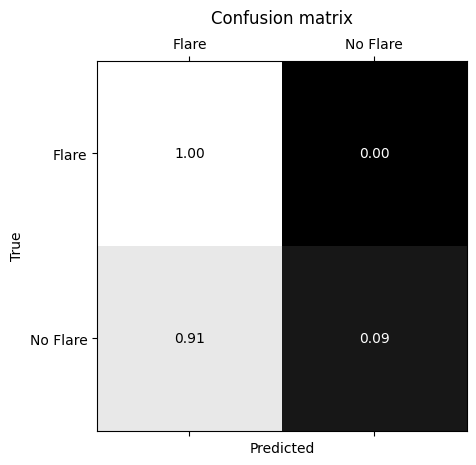

In [24]:
plot_confusion_matrix(cnn, test_data, test_labels)